# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 904 ms, sys: 6.08 ms, total: 910 ms
Wall time: 911 ms
Train ROC-AUC 0.9898
Valid ROC-AUC 0.9262
Test ROC-AUC 0.9181


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

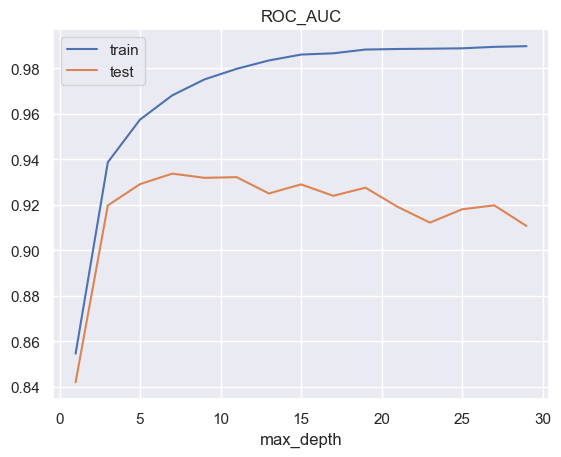

In [7]:
results = {'train':[], 'test':[]}

depths = range(1, 30, 2)

for max_depth in depths:
    boosting = Boosting(base_model_params={'max_depth':max_depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['train'].append(boosting.score(x_train, y_train))
    results['test'].append(boosting.score(x_test, y_test))
    
    
line1, = plt.plot(depths, results['train'], label='train')
line2, = plt.plot(depths, results['test'], label='test')
plt.legend(handles=[line1, line2])
plt.xlabel('max_depth')
plt.title('ROC_AUC')
plt.show()


**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

С параметром max_depth=6 модель имеет наилучшее качество. Чем больше глубина деревьев, тем сильнее переобучается модель.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

base model:
    **max_depth**,
    **min_samples_split**,
    **min_samples_leaf**

boosting:
    **n_estimators**,
    **learning_rate**,
    **subsample**,



In [8]:
import sklearn
import optuna

In [24]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 30)
    learning_rate = trial.suggest_float('learning_rate', 0, 1)
    
    max_depth = np.intc(trial.suggest_int('max_depth', 1, 15))
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
    subsample = trial.suggest_float('subsample', 0.1, 1)
    model = Boosting(base_model_params={'max_depth':max_depth,\
                                        'min_samples_split':min_samples_split,\
                                        'min_samples_leaf':min_samples_leaf}, \
                     n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample)
    
    scores = []
    for _ in range(3):
        model.fit(x_train, y_train, x_valid, y_valid)
        scores.append(model.score(x_valid, y_valid))
        
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('ROC-AUC: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-12-17 13:29:52,751] A new study created in memory with name: no-name-74191338-139d-4836-b542-cd7221f98eb9


[I 2023-12-17 13:29:54,327] Trial 0 finished with value: 0.9325571192116854 and parameters: {'n_estimators': 7, 'learning_rate': 0.07513508182636297, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 20, 'subsample': 0.9726474086317246}. Best is trial 0 with value: 0.9325571192116854.
[I 2023-12-17 13:29:57,312] Trial 1 finished with value: 0.9356410630946024 and parameters: {'n_estimators': 14, 'learning_rate': 0.3843480235515002, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 8, 'subsample': 0.915203557218148}. Best is trial 1 with value: 0.9356410630946024.
[I 2023-12-17 13:29:59,020] Trial 2 finished with value: 0.8977889843791366 and parameters: {'n_estimators': 14, 'learning_rate': 0.11724381249182758, 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 16, 'subsample': 0.8752604710232241}. Best is trial 1 with value: 0.9356410630946024.
[I 2023-12-17 13:29:59,430] Trial 3 finished with value: 0.9280394912969246 and parameters: {'n_estimators': 2

ROC-AUC: 0.9402149634734505
Best hyperparameters: {'n_estimators': 29, 'learning_rate': 0.5224537361316531, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2, 'subsample': 0.5209088043983885}


In [25]:
# best params
n_estimators = 29
learning_rate = 0.52
subsample = 0.5
base_model_params = {'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2}

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [20]:
def plot_calibration_curve(y_test, preds, ax, title):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    
    y = (y_test + 1) / 2
    for i in range(n_bins):
        l = i * 1.0 / n_bins
        r = (i+1) * 1.0 / n_bins
        bin_middle_points.append((r + l) / 2)
        bin_real_ratios.append(np.sum(y * np.where((preds >= l) & (preds < r), 1, 0))/np.sum(np.where((preds >= l) & (preds < r), 1, 0)))

    ax.grid()
    ax.set_title(f'{title} Calibration curve', fontsize=15)
    ax.set_xlabel('probs for positive class')
    ax.set_ylabel('true ratios')
    ax.plot(bin_middle_points, bin_real_ratios)
    ax.plot([0,1], [0,1], '--')
    plt.ylim([-0.05, 1.05])


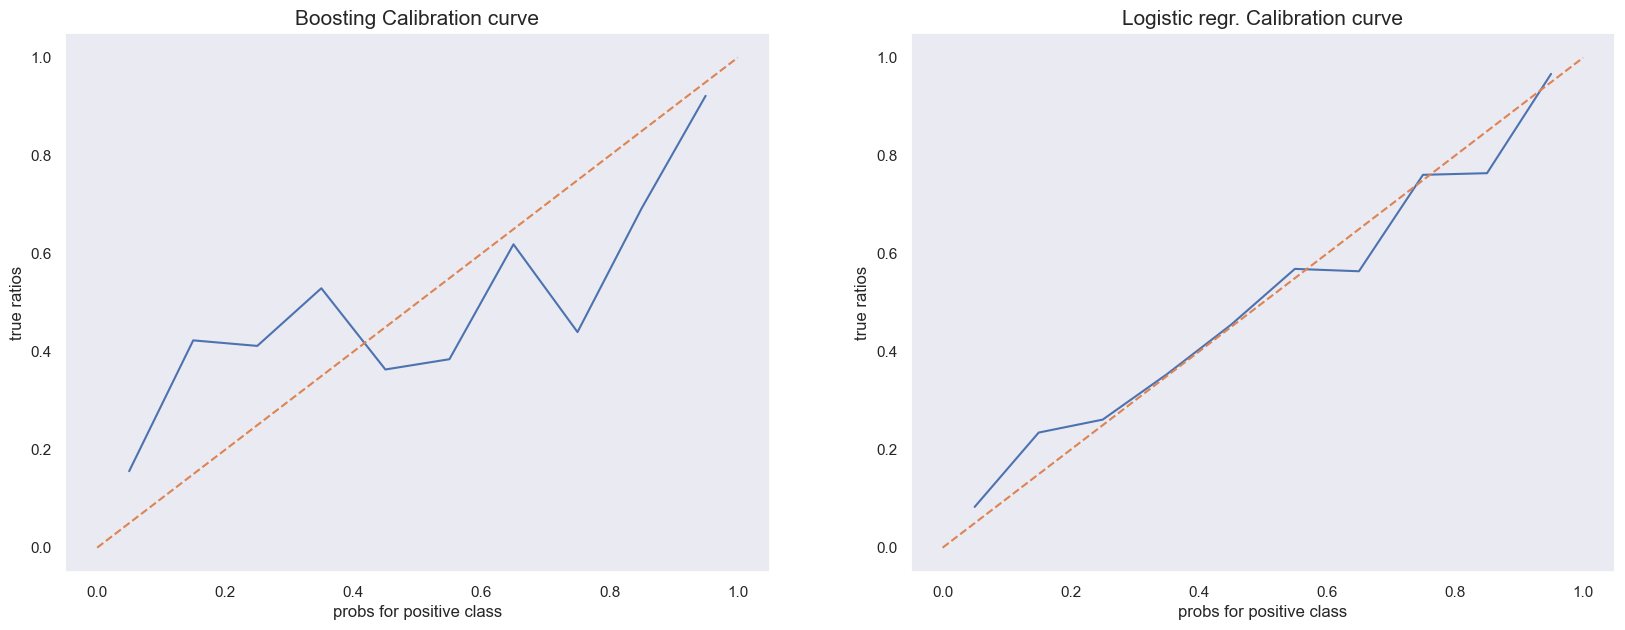

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20, 7))

model = Boosting(base_model_params=base_model_params, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample)
model.fit(x_train, y_train, x_valid, y_valid)
y_pred = model.predict_proba(x_test)[:, 1]
plot_calibration_curve(y_test, y_pred, ax[0], 'Boosting')

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_proba = model.predict_proba(x_test)[:, 1]
plot_calibration_curve(y_test, y_pred_proba, ax[1], 'Logistic regr.')
plt.show()


Наша модель не очень уверена в своих предсказаниях, то есть большую вероятность она предсказывает для меньшей доли объектов, а маленькую для большей. Логистическая регрессия тем временем достаточно хорошо предсказала вероятности, но это и ожидаемо в связи с ее функцией потерь.

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

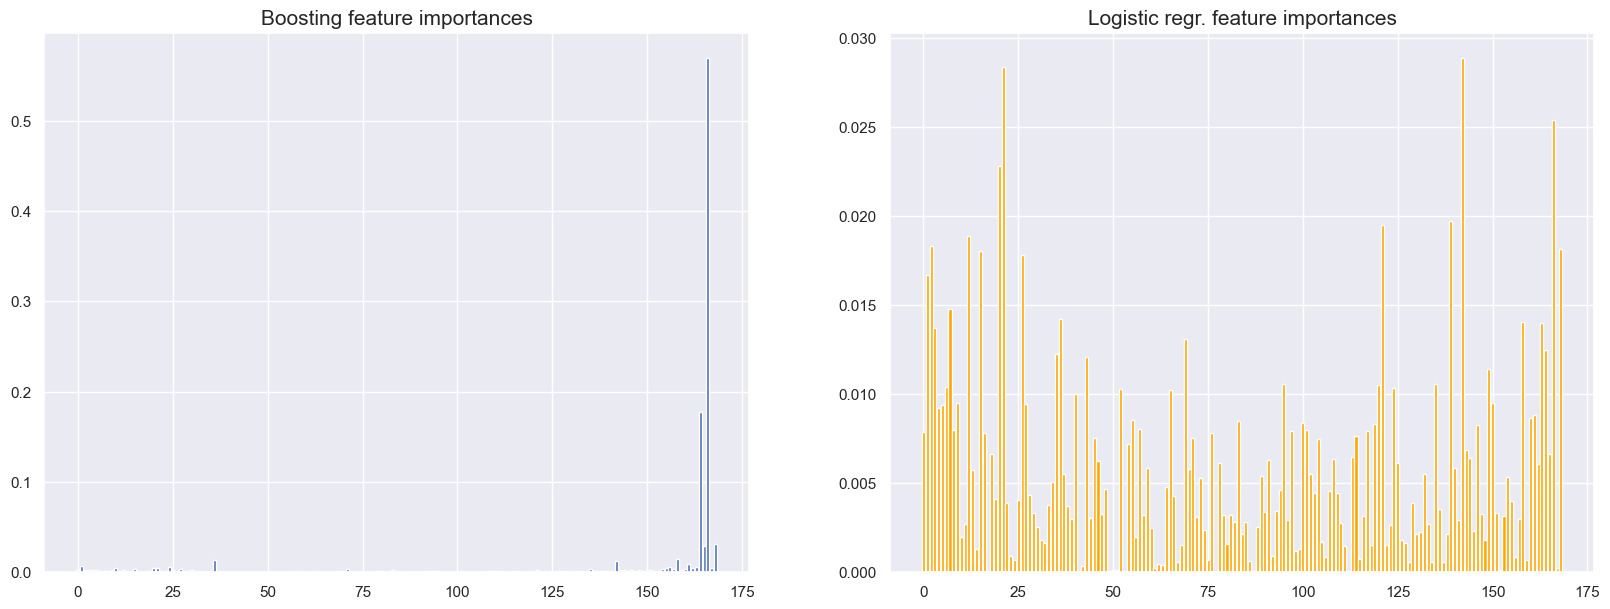

In [66]:
boosting = Boosting(base_model_params=base_model_params, n_estimators=n_estimators, learning_rate=learning_rate)
boosting.fit(x_train, y_train, x_valid, y_valid)
f_imps_boosting = boosting.feature_importances_

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
f_imps_logreg = np.abs(logreg.coef_[0]) / np.sum(np.abs(logreg.coef_[0]))

f, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].bar(np.arange(169), f_imps_boosting)
ax[0].set_title('Boosting feature importances', fontsize=15)
ax[1].bar(np.arange(169), f_imps_logreg, color='orange')
ax[1].set_title('Logistic regr. feature importances', fontsize=15)
plt.show()

Бустинг говорит, что важных признаков совсем немного, но это следует из того, что важность соответствует делению выборки по данному признаку. Могут быть признаки, по которым никогда не происходило деления, в то время как у логистической регрессии все признаки участвуют в обучении модели и в предсказаниях.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

ROC-AUC test:  0.9364627009256474


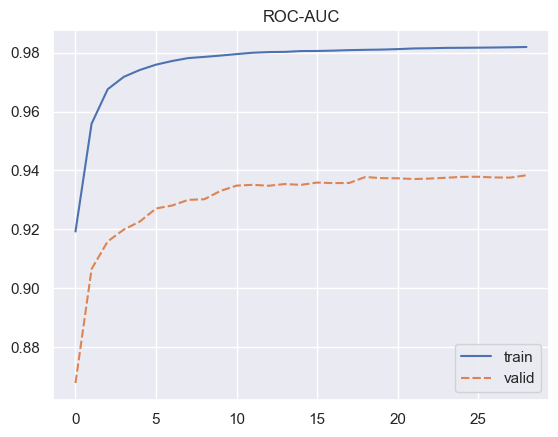

In [77]:
boosting = Boosting(base_model_params=base_model_params, n_estimators=n_estimators, learning_rate=learning_rate, plot=True)
boosting.fit(x_train, y_train, x_valid, y_valid)
f_imps_boosting = boosting.feature_importances_
idxs = np.argsort(f_imps_boosting)[140:]
print('ROC-AUC test: ', boosting.score(x_test, y_test))

ROC-AUC test:  0.9352711994369596


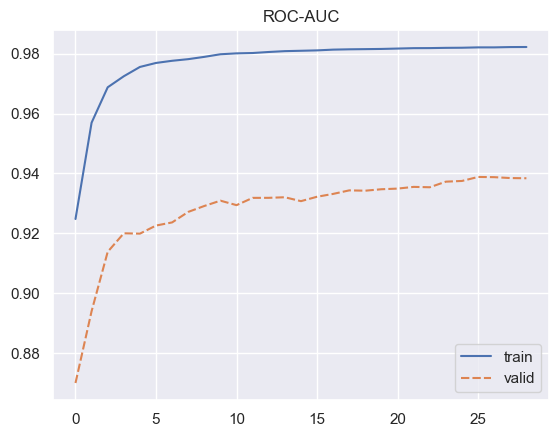

In [78]:
boosting = Boosting(base_model_params=base_model_params, n_estimators=n_estimators, learning_rate=learning_rate, plot=True)
boosting.fit(x_train.toarray()[:, idxs], y_train, x_valid.toarray()[:, idxs], y_valid)
print('ROC-AUC test: ', boosting.score(x_test.toarray()[:, idxs], y_test))

Как можем заметить, даже если отбросить хвост из 140 самых не важных признаков, качество не меняется или становится хуже. 

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [87]:
boosting = Boosting(base_model_params=base_model_params, n_estimators=n_estimators, learning_rate=learning_rate, blend=True)
boosting.fit(x_train, y_train, x_valid, y_valid)
print('ROC-AUC test: ', boosting.score(x_test, y_test))

ROC-AUC test:  0.9318569001594967


In [93]:
from sklearn.metrics import roc_auc_score
model = LogisticRegression().fit(x_train, y_train)
y_logreg_pred = model.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, y_logreg_pred)

0.9378958878831345

In [91]:
boosting = Boosting(n_estimators=n_estimators, learning_rate=learning_rate, blend=True, base_model_class=LogisticRegression)
boosting.fit(x_train, y_train, x_valid, y_valid)
print('ROC-AUC test: ', boosting.score(x_test, y_test))

ROC-AUC test:  0.937445581407066


Качество не улучшилось, но и не сильно упало

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

С другими параметрами у катбуста получилось лучше нашего бустинга на 0.007...

In [108]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=25,
                           depth=13,
                           learning_rate=0.2,
                           loss_function='Logloss',
                           verbose=True)

model.fit(x_train, y_train)
preds_class = model.predict(x_test)
preds_proba = model.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, preds_proba)


0:	learn: 0.4774033	total: 84.8ms	remaining: 2.04s
1:	learn: 0.3616504	total: 158ms	remaining: 1.82s
2:	learn: 0.3049752	total: 228ms	remaining: 1.67s
3:	learn: 0.2732074	total: 298ms	remaining: 1.56s
4:	learn: 0.2531715	total: 371ms	remaining: 1.48s
5:	learn: 0.2411633	total: 435ms	remaining: 1.38s
6:	learn: 0.2327474	total: 499ms	remaining: 1.28s
7:	learn: 0.2252432	total: 563ms	remaining: 1.2s
8:	learn: 0.2196234	total: 626ms	remaining: 1.11s
9:	learn: 0.2124929	total: 689ms	remaining: 1.03s
10:	learn: 0.2065383	total: 752ms	remaining: 957ms
11:	learn: 0.2037122	total: 814ms	remaining: 882ms
12:	learn: 0.2005239	total: 876ms	remaining: 808ms
13:	learn: 0.1972793	total: 938ms	remaining: 737ms
14:	learn: 0.1936147	total: 1s	remaining: 667ms
15:	learn: 0.1918817	total: 1.06s	remaining: 598ms
16:	learn: 0.1897504	total: 1.12s	remaining: 529ms
17:	learn: 0.1873310	total: 1.19s	remaining: 461ms
18:	learn: 0.1851205	total: 1.25s	remaining: 394ms
19:	learn: 0.1824427	total: 1.31s	remaining:

0.9382840016815642

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

елка в яндексе очень крутая, к сожалению пока не успела нарядить свою

очень хочется чтобы в 2024 все было хорошо


![урановыйгод](photo_2023-12-18.JPG)